In [1]:
1+1

2

In [2]:
import os
import numpy as np
import pandas as pd
from six.moves import cPickle
import PIL
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import multiprocessing
import random
import sklearn
from sklearn import metrics
import seaborn as sns
import cv2
import skimage
from skimage import restoration
import copy
import seaborn as sns

In [3]:
raw_RAD_id_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(raw_RAD_id_list))
RAD_id_list = raw_RAD_id_list

15000


In [4]:
RAD_id_submit_list = os.listdir("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2/")
print(len(RAD_id_submit_list))

8000


In [5]:
image_size = 64
nt = 4 # number of timesteps used for sequences in training
image_scalar = 80
vmin = -1
vmax = 0.6 * image_scalar
step_size = 5

In [8]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = [255, 255, 255]

In [70]:
for counter, RAD_id in enumerate(RAD_id_list[:50]):
    move_list = []
    temp_matrix_list = []
    print(RAD_id)
    for i in range(52, 55, 1):
#     for i in range(0, 60, 5):
#     for i in range(0, 5, 5):
        temp_matrix_old = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + 0))).astype(np.uint8)
        temp_matrix_new = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + step_size))).astype(np.uint8)
        temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
        temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)
        temp_matrix_list.append(temp_matrix_new)
#         plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
#         plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
        p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)
        # Create a mask image for drawing purposes
        mask = np.zeros_like(temp_matrix_old)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        
        move = (good_new - good_old).mean(axis=0)
        move_list.append(move)
        
        # draw the tracks
        for j,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color, 2)
            img = copy.deepcopy(temp_matrix_new)
            img = cv2.circle(img,(a,b),3,color,-1)
        img = cv2.add(img,mask)
        
#         print(i, i+5)
#         print(move)
#         plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
#         H = np.float32([[1,0,move[0]], [0,1,move[1]]])
#         res = cv2.warpAffine(img, H, (501, 501))
#         plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
    move_list = np.array(move_list)
    move = move_list.mean(axis=0)
    for i in range(len(temp_matrix_list)):
        k = (len(temp_matrix_list) - 1 - i)
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        temp_matrix_list[i] = cv2.warpAffine(temp_matrix_list[i], H, (501, 501))
        
    temp_matrix_list = np.array(temp_matrix_list)
    temp_matrix = temp_matrix_list.mean(axis=0)
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    res = cv2.warpAffine(temp_matrix, H, (501, 501))
#     plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
#     plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()

RAD_436482474222544
RAD_326482464239548
RAD_426382464232542
RAD_256582464212538
RAD_416382474232536
RAD_446482464229537
RAD_206582464222546
RAD_466382464212541
RAD_496482474232542
RAD_336482464232533
RAD_466582464222547
RAD_336582474229546
RAD_496382464219531
RAD_486382464212548
RAD_256482474239552
RAD_376382464222540
RAD_296482464232543
RAD_296582474222537
RAD_346482464229534
RAD_446382464219545
RAD_386582474222532
RAD_236482464222542
RAD_306382464229539
RAD_236482464229542
RAD_426582474222545
RAD_426582474222551
RAD_356582464229531
RAD_486582464229549
RAD_266482464229547
RAD_476482474229534
RAD_486382464229548
RAD_436382474232551


/home/hadoop/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/home/hadoop/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


error: OpenCV(3.4.2) /io/opencv/modules/video/src/lkpyramid.cpp:1244: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, 5, true)) >= 0 in function 'calc'


In [20]:
p0 = [None]

In [21]:
try:
    len(p0)
except:
    print('e')

In [17]:
p0

In [22]:
def predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train'):
    mean_list = []
    for i in range(31):
        temp = np.array(PIL.Image.open('%s/%s/%s_%03d.png' % (path, RAD_id, RAD_id, i))).astype(np.uint8)
        temp = np.where(temp==255, 0, temp)
        mean_list.append(temp.ravel().mean())
    mean_list = np.array(mean_list)
    if mean_list.mean() < 0.45:
        return [temp] * 6
    
    move_list = []
    temp_matrix_list = []
#     print(RAD_id)
    for i in range(20, 26, 1):
#     for i in range(20, 26, 1):
#     for i in range(0, 60, 5):
#     for i in range(0, 5, 5):
        temp_matrix_old = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, i + 0))).astype(np.uint8)
        temp_matrix_new = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, i + step_size))).astype(np.uint8)
        temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
        temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)
        temp_matrix_list.append(temp_matrix_new)
#         plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
#         plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
        p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)
        
        try:
            len(p0)
        except:
            return [temp] * 6
        
        # Create a mask image for drawing purposes
        mask = np.zeros_like(temp_matrix_old)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        
        move = (good_new - good_old).mean(axis=0)
        move_list.append(move)
        
#         # draw the tracks
#         for j,(new,old) in enumerate(zip(good_new,good_old)):
#             a,b = new.ravel()
#             c,d = old.ravel()
#             mask = cv2.line(mask, (a,b),(c,d), color, 2)
#             img = copy.deepcopy(temp_matrix_new)
#             img = cv2.circle(img,(a,b),3,color,-1)
#         img = cv2.add(img,mask)
        
#         print(i, i+step_size)
#         print(move)
#         plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
#         H = np.float32([[1,0,move[0]], [0,1,move[1]]])
#         res = cv2.warpAffine(img, H, (501, 501))
#         plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
    move_list = np.array(move_list)
    move = move_list.mean(axis=0)
    for i in range(len(temp_matrix_list)):
        k = (len(temp_matrix_list) - 1 - i)
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        temp_matrix_list[i] = cv2.warpAffine(temp_matrix_list[i], H, (501, 501))
        
    temp_matrix_list = np.array(temp_matrix_list)
    temp_matrix = temp_matrix_list.mean(axis=0)
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    res = cv2.warpAffine(temp_matrix, H, (501, 501))
#     plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
#     plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#     plt.show()
    
    ans_list = []
    for i in range(1, 7):
        k = i
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        res = cv2.warpAffine(temp_matrix, H, (501, 501))
        ans_list.append(res)
    return ans_list

In [10]:
start_time = time.time()
print(time.strftime("start time: %Y-%m-%d %H:%M:%S", time.localtime()))
model_abs_loss = []
model_sqr_loss = []
last_frame_abs_loss = []
last_frame_sqr_loss = []
for RAD_id_counter, RAD_id in enumerate(RAD_id_list[:100]):
    x_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 30))).astype(np.uint8)
    x_last = np.where(x_last==255, 0, x_last)
    y_true_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 60))).astype(np.uint8)
    y_true_last = np.where(y_true_last==255, 0, y_true_last)
    y_pred_last = predict(RAD_id)[-1]
    last_frame_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    last_frame_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    if RAD_id_counter % 10 == 0:
        print('RAD_id_counter=%5d\t\tIt takes %.2f' % (RAD_id_counter, time.time() - start_time))
model_abs_loss = np.array(model_abs_loss)
last_frame_abs_loss = np.array(last_frame_abs_loss)
model_sqr_loss = np.array(model_sqr_loss)
last_frame_sqr_loss = np.array(last_frame_sqr_loss)
print('     model_abs_loss=%.7f' % model_abs_loss.mean())
print('last_frame_abs_loss=%.7f' % last_frame_abs_loss.mean())
print('     model_sqr_loss=%.7f' % model_sqr_loss.mean())
print('last_frame_sqr_loss=%.7f' % last_frame_sqr_loss.mean())
print(time.strftime('It took  %H:%M:%S', time.gmtime(time.time() - start_time)))
print(time.strftime("end time: %Y-%m-%d %H:%M:%S", time.localtime()))

start time: 2018-10-06 01:55:23
RAD_id_counter=    0		It takes 0.13
RAD_id_counter=   10		It takes 0.65
RAD_id_counter=   20		It takes 1.31
RAD_id_counter=   30		It takes 2.11
RAD_id_counter=   40		It takes 2.77
RAD_id_counter=   50		It takes 3.43
RAD_id_counter=   60		It takes 4.09
RAD_id_counter=   70		It takes 4.90
RAD_id_counter=   80		It takes 5.52
RAD_id_counter=   90		It takes 6.37
     model_abs_loss=1.7828282
last_frame_abs_loss=1.9779436
     model_sqr_loss=32.9963815
last_frame_sqr_loss=40.9361165
It took  00:00:06
end time: 2018-10-06 01:55:30


     model_abs_loss=1.7828282
last_frame_abs_loss=1.9779436
     model_sqr_loss=32.9963815
last_frame_sqr_loss=40.9361165


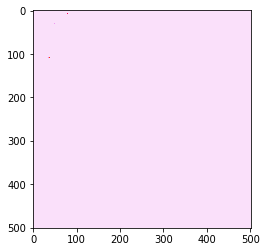

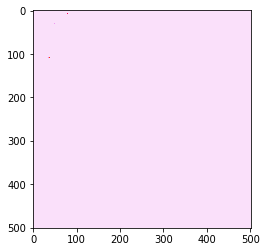

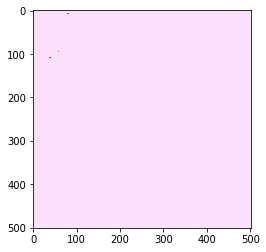

In [11]:
print('     model_abs_loss=%.7f' % model_abs_loss.mean())
print('last_frame_abs_loss=%.7f' % last_frame_abs_loss.mean())
print('     model_sqr_loss=%.7f' % model_sqr_loss.mean())
print('last_frame_sqr_loss=%.7f' % last_frame_sqr_loss.mean())

plt.imshow(x_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

plt.imshow(y_pred_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

plt.imshow(y_true_last, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

In [23]:
version = 'SRAD2018_Neutrino_Optical_Flow_v0.2.1.1_18.10.06.01.55'

In [25]:
print('version=%s' % version)
start_time = time.time()
print(time.strftime("start time: %Y-%m-%d %H:%M:%S", time.localtime()))
for RAD_id_counter, RAD_id in enumerate(RAD_id_submit_list):
    if not os.path.exists("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s" % (version, RAD_id)):
        os.makedirs("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s" % (version, RAD_id))
    result_list = predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2')
    for i in range(6):
        result = result_list[i]
        result = result.astype(np.uint8)
        result = np.where(result==0, 255, result)
        result = PIL.Image.fromarray(result)
        result.save("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_submit/%s/%s/%s_f%03d.png" % (version, RAD_id, RAD_id, i + 1))
    if RAD_id_counter % 10 == 0:
        print('RAD_id_counter=%5d\t\tIt takes %.2f' % (RAD_id_counter, time.time() - start_time))
print(time.strftime('It took  %H:%M:%S', time.gmtime(time.time() - start_time)))
print(time.strftime("end time: %Y-%m-%d %H:%M:%S", time.localtime()))

version=SRAD2018_Neutrino_Optical_Flow_v0.2.1.1_18.10.06.01.55
start time: 2018-10-06 02:02:44
RAD_id_counter=    0		It takes 0.04
RAD_id_counter=   10		It takes 0.83
RAD_id_counter=   20		It takes 2.21
RAD_id_counter=   30		It takes 3.21
RAD_id_counter=   40		It takes 4.08
RAD_id_counter=   50		It takes 4.82
RAD_id_counter=   60		It takes 5.84
RAD_id_counter=   70		It takes 6.86
RAD_id_counter=   80		It takes 7.60
RAD_id_counter=   90		It takes 8.37
RAD_id_counter=  100		It takes 9.18
RAD_id_counter=  110		It takes 10.09
RAD_id_counter=  120		It takes 11.19
RAD_id_counter=  130		It takes 11.98
RAD_id_counter=  140		It takes 13.25
RAD_id_counter=  150		It takes 14.10
RAD_id_counter=  160		It takes 15.54
RAD_id_counter=  170		It takes 16.50
RAD_id_counter=  180		It takes 17.65
RAD_id_counter=  190		It takes 18.75
RAD_id_counter=  200		It takes 19.77
RAD_id_counter=  210		It takes 20.68
RAD_id_counter=  220		It takes 21.58
RAD_id_counter=  230		It takes 22.47
RAD_id_counter=  240		It tak

/home/hadoop/.local/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice.
/home/hadoop/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


RAD_id_counter= 1780		It takes 182.07
RAD_id_counter= 1790		It takes 183.26
RAD_id_counter= 1800		It takes 184.27
RAD_id_counter= 1810		It takes 185.41
RAD_id_counter= 1820		It takes 186.31
RAD_id_counter= 1830		It takes 187.60
RAD_id_counter= 1840		It takes 188.62
RAD_id_counter= 1850		It takes 189.58
RAD_id_counter= 1860		It takes 190.47
RAD_id_counter= 1870		It takes 191.56
RAD_id_counter= 1880		It takes 192.72
RAD_id_counter= 1890		It takes 193.53
RAD_id_counter= 1900		It takes 194.72
RAD_id_counter= 1910		It takes 195.53
RAD_id_counter= 1920		It takes 196.57
RAD_id_counter= 1930		It takes 197.64
RAD_id_counter= 1940		It takes 198.46
RAD_id_counter= 1950		It takes 199.25
RAD_id_counter= 1960		It takes 200.43
RAD_id_counter= 1970		It takes 201.59
RAD_id_counter= 1980		It takes 202.62
RAD_id_counter= 1990		It takes 203.57
RAD_id_counter= 2000		It takes 204.58
RAD_id_counter= 2010		It takes 205.43
RAD_id_counter= 2020		It takes 206.54
RAD_id_counter= 2030		It takes 207.52
RAD_id_count

RAD_id_counter= 3940		It takes 397.42
RAD_id_counter= 3950		It takes 398.37
RAD_id_counter= 3960		It takes 399.66
RAD_id_counter= 3970		It takes 400.58
RAD_id_counter= 3980		It takes 401.55
RAD_id_counter= 3990		It takes 402.78
RAD_id_counter= 4000		It takes 403.73
RAD_id_counter= 4010		It takes 404.78
RAD_id_counter= 4020		It takes 405.57
RAD_id_counter= 4030		It takes 406.45
RAD_id_counter= 4040		It takes 407.33
RAD_id_counter= 4050		It takes 408.28
RAD_id_counter= 4060		It takes 409.19
RAD_id_counter= 4070		It takes 410.17
RAD_id_counter= 4080		It takes 411.28
RAD_id_counter= 4090		It takes 412.34
RAD_id_counter= 4100		It takes 413.20
RAD_id_counter= 4110		It takes 414.15
RAD_id_counter= 4120		It takes 415.19
RAD_id_counter= 4130		It takes 416.62
RAD_id_counter= 4140		It takes 417.70
RAD_id_counter= 4150		It takes 418.99
RAD_id_counter= 4160		It takes 419.77
RAD_id_counter= 4170		It takes 420.91
RAD_id_counter= 4180		It takes 421.50
RAD_id_counter= 4190		It takes 422.56
RAD_id_count

RAD_id_counter= 6100		It takes 616.87
RAD_id_counter= 6110		It takes 617.74
RAD_id_counter= 6120		It takes 619.07
RAD_id_counter= 6130		It takes 620.07
RAD_id_counter= 6140		It takes 621.12
RAD_id_counter= 6150		It takes 622.34
RAD_id_counter= 6160		It takes 623.11
RAD_id_counter= 6170		It takes 623.80
RAD_id_counter= 6180		It takes 624.80
RAD_id_counter= 6190		It takes 626.01
RAD_id_counter= 6200		It takes 626.92
RAD_id_counter= 6210		It takes 627.82
RAD_id_counter= 6220		It takes 628.98
RAD_id_counter= 6230		It takes 629.85
RAD_id_counter= 6240		It takes 631.09
RAD_id_counter= 6250		It takes 632.29
RAD_id_counter= 6260		It takes 633.36
RAD_id_counter= 6270		It takes 634.37
RAD_id_counter= 6280		It takes 635.40
RAD_id_counter= 6290		It takes 636.28
RAD_id_counter= 6300		It takes 637.36
RAD_id_counter= 6310		It takes 638.53
RAD_id_counter= 6320		It takes 639.23
RAD_id_counter= 6330		It takes 640.21
RAD_id_counter= 6340		It takes 641.30
RAD_id_counter= 6350		It takes 642.02
RAD_id_count

RAD_387973435690474


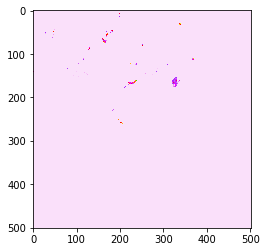

RAD_447173435670453


/home/hadoop/.local/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice.
/home/hadoop/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


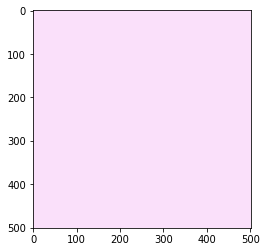

In [28]:
for RAD_id_counter, RAD_id in enumerate(RAD_id_submit_list[1775:1777]):
    result_list = predict(RAD_id, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2')
    print(RAD_id)
    plt.imshow(result_list[-1], cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
    plt.show()

```bash
zip -r "SRAD2018_Neutrino_Optical_Flow_v0.2.1.1_18.10.06.01.55.zip" "SRAD2018_Neutrino_Optical_Flow_v0.2.1.1_18.10.06.01.55"
ls | wc -l
scp -P 50000 hadoop@222.200.177.32:~/Documents/Neutrino/SRAD2018/SRAD2018_submit/SRAD2018_Neutrino_Optical_Flow_v0.2.1.1_18.10.06.01.55.zip C:/SRAD2018/
```

# Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html
- https://blog.csdn.net/on2way/article/details/46801063